In [68]:
import pandas as pd
from factor_analyzer import ConfirmatoryFactorAnalyzer, ModelSpecificationParser
import seaborn as sn 
import matplotlib.pyplot as plt 

import warnings
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [74]:
# Load data
raw_df = pd.read_excel("data_02.xlsx",sheet_name="42 records (no major missing)")
raw_df

,DistributionChannel,UserLanguage,Q2,Q3,Q4,Q5,Q8_1,Q8_2,Q8_3,Q8_4,...,Q11_4,Q11_5,Q11_6,Q11_7,Q12,Q13,Q14,Q15,Q16,Q17
0,Distribution Channel,User Language,Do you know there is a unit within the Faculty...,Have you ever participated in any of the follo...,Have you ever participated in any of the follo...,How often do you engage in WiEIT activities:,(Sense of Belonging) \nIn the Women in Enginee...,(Sense of Belonging) \nIn the Women in Enginee...,(Sense of Belonging) \nIn the Women in Enginee...,(Sense of Belonging) \nIn the Women in Enginee...,...,(Mattering) \nThere are people in the Faculty...,(Mattering) \nThere are people in the Faculty...,(Mattering) \nThere are people in the Faculty...,(Mattering) \nThere are people in the Faculty...,I am... (multiple answers allowed),Are you,What year did you start working/studying at UTS?,Do you speak a language other than English at ...,I am/ have been:,(Gender)\n\nI identify as: (multiple answers a...
1,anonymous,EN,1,4,4,4,3,1,2,3,...,4,5,4,3,1,2,2022,1,2,4
2,anonymous,EN,1,7,2,1,1,3,5,1,...,1,1,1,1,6,NaN,2021,1,11,1
3,anonymous,EN,1,7,"1,3",1,4,4,2,3,...,3,4,4,3,6,NaN,2019,1,9,1
4,anonymous,EN,1,2,1,2,4,3,2,3,...,4,3,4,4,4,1,NaN,2,5,1
5,anonymous,EN,1,"1,4","2,4",2,5,5,2,4,...,4,3,4,4,1,2,2020,1,"2,3,8,11",1
6,anonymous,EN,1,7,2,2,5,5,1,4,...,5,5,5,5,"5,6",NaN,2018,1,12,1
7,anonymous,EN,1,7,2,1,3,4,4,2,...,2,3,4,4,1,2,2023,2,12,1
8,anonymous,EN,1,7,"2,3",2,4,4,2,5,...,4,4,4,4,1,2,2023,2,"1,11",1
9,anonymous,EN,1,1,2,2,4,4,2,4,...,3,4,3,3,2,1,NaN,1,"3,11",1


In [3]:
raw_df.columns

Index(['DistributionChannel', 'UserLanguage', 'Q2', 'Q3', 'Q4', 'Q5', 'Q8_1',
       'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q9_1', 'Q9_2',
       'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7', 'Q10_1', 'Q10_2', 'Q10_3',
       'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q11_1', 'Q11_2', 'Q11_3',
       'Q11_4', 'Q11_5', 'Q11_6', 'Q11_7', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16',
       'Q17'],
      dtype='object')

### Filter the data needed

In [4]:
# Filter data
filtered_data = raw_df.iloc[1:,6:-6]

In [5]:
filtered_data.columns

Index(['Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q9_1',
       'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7', 'Q10_1', 'Q10_2',
       'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q11_1', 'Q11_2',
       'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q11_7'],
      dtype='object')

In [6]:
filtered_data.head()

,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q9_1,Q9_2,...,Q10_6,Q10_7,Q10_8,Q11_1,Q11_2,Q11_3,Q11_4,Q11_5,Q11_6,Q11_7
1,3,1,2,3,4,5,4,3,1,2,...,4,3,2,1,2,3,4,5,4,3
2,1,3,5,1,5,3,3,5,3,3,...,3,2,5,1,1,1,1,1,1,1
3,4,4,2,3,4,2,4,2,4,4,...,2,4,2,4,4,4,3,4,4,3
4,4,3,2,3,3,2,3,4,4,4,...,4,4,3,4,4,3,4,3,4,4
5,5,5,2,4,5,2,5,1,5,5,...,3,3,3,4,4,4,4,3,4,4


In [7]:
filtered_data.isnull().sum()

Q8_1     0
Q8_2     0
Q8_3     0
Q8_4     0
Q8_5     0
Q8_6     0
Q8_7     0
Q8_8     0
Q9_1     0
Q9_2     0
Q9_3     0
Q9_4     0
Q9_5     0
Q9_6     0
Q9_7     0
Q10_1    0
Q10_2    0
Q10_3    0
Q10_4    0
Q10_5    0
Q10_6    0
Q10_7    0
Q10_8    0
Q11_1    0
Q11_2    0
Q11_3    0
Q11_4    0
Q11_5    0
Q11_6    0
Q11_7    0
dtype: int64

In [8]:
# See the types of each columns
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 1 to 42
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q8_1    42 non-null     object
 1   Q8_2    42 non-null     object
 2   Q8_3    42 non-null     object
 3   Q8_4    42 non-null     object
 4   Q8_5    42 non-null     object
 5   Q8_6    42 non-null     object
 6   Q8_7    42 non-null     object
 7   Q8_8    42 non-null     object
 8   Q9_1    42 non-null     object
 9   Q9_2    42 non-null     object
 10  Q9_3    42 non-null     object
 11  Q9_4    42 non-null     object
 12  Q9_5    42 non-null     object
 13  Q9_6    42 non-null     object
 14  Q9_7    42 non-null     object
 15  Q10_1   42 non-null     object
 16  Q10_2   42 non-null     object
 17  Q10_3   42 non-null     object
 18  Q10_4   42 non-null     object
 19  Q10_5   42 non-null     object
 20  Q10_6   42 non-null     object
 21  Q10_7   42 non-null     object
 22  Q10_8   42 non-null     obje

### Change the data type of all column

In [9]:
ch_type_f_data = filtered_data.astype('int32')

In [10]:
ch_type_f_data.dtypes

Q8_1     int32
Q8_2     int32
Q8_3     int32
Q8_4     int32
Q8_5     int32
Q8_6     int32
Q8_7     int32
Q8_8     int32
Q9_1     int32
Q9_2     int32
Q9_3     int32
Q9_4     int32
Q9_5     int32
Q9_6     int32
Q9_7     int32
Q10_1    int32
Q10_2    int32
Q10_3    int32
Q10_4    int32
Q10_5    int32
Q10_6    int32
Q10_7    int32
Q10_8    int32
Q11_1    int32
Q11_2    int32
Q11_3    int32
Q11_4    int32
Q11_5    int32
Q11_6    int32
Q11_7    int32
dtype: object

In [11]:
ch_type_f_data.loc[:,["Q8_3","Q8_6","Q8_8","Q10_3","Q10_6","Q10_8"]]

,Q8_3,Q8_6,Q8_8,Q10_3,Q10_6,Q10_8
1,2,5,3,3,4,2
2,5,3,5,1,3,5
3,2,2,2,2,2,2
4,2,2,4,2,4,3
5,2,2,1,4,3,3
6,1,1,1,1,1,1
7,4,5,4,3,2,4
8,2,2,2,2,2,3
9,2,2,2,2,2,2
10,3,3,3,3,3,2


# Must Reverse some columns

In [12]:
# Q8_3, Q8_6, Q8_8, Q10_3, Q10_6 and Q10_8

In [13]:
ch_type_f_data.columns

Index(['Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q9_1',
       'Q9_2', 'Q9_3', 'Q9_4', 'Q9_5', 'Q9_6', 'Q9_7', 'Q10_1', 'Q10_2',
       'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q11_1', 'Q11_2',
       'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q11_7'],
      dtype='object')

In [14]:
ch_type_f_data.loc[:,["Q8_3","Q8_6","Q8_8","Q10_3","Q10_6","Q10_8"]] = ch_type_f_data.loc[:,["Q8_3","Q8_6","Q8_8","Q10_3","Q10_6","Q10_8"]].map(lambda x: 6-x)

In [15]:
ch_type_f_data.loc[:,["Q8_3","Q8_6","Q8_8","Q10_3","Q10_6","Q10_8"]]

,Q8_3,Q8_6,Q8_8,Q10_3,Q10_6,Q10_8
1,4,1,3,3,2,4
2,1,3,1,5,3,1
3,4,4,4,4,4,4
4,4,4,2,4,2,3
5,4,4,5,2,3,3
6,5,5,5,5,5,5
7,2,1,2,3,4,2
8,4,4,4,4,4,3
9,4,4,4,4,4,4
10,3,3,3,3,3,4


# Confirmatory Factor Analysis (CFA) 
> is a statistical method used to test a hypothesized factor structure by assessing how well the observed variables align with the expected latent factors. In Python, you can perform CFA using libraries such as factor_analyzer or sklearn. Here are the steps to calculate loadings and fit indices:
>> 1. Model Specification:
>>> - Define your model by specifying which observed variables (columns in your dataset) are associated with each latent factor. For example:
      `model_dict = {"F1": factor_1, "F2": factor_2}`
>>> - Create a model specification using the ModelSpecificationParser from your data. This step ensures that the specified factors align with the observed variables¹.
_________________________________
>> 2. Fitting the Model:
>>> - Initialize the ConfirmatoryFactorAnalyzer (CFA) with the model specification: `cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)`
>>> - Fit the CFA model to your data: `cfa.fit(df[influence_scale].values)`
>>> - Extract the loadings (factor loadings) from the fitted model: `cfa_loadings = pd.DataFrame(cfa.loadings_)`
>>> - The loadings represent the strength of the relationship between each observed variable and its associated latent factor.

In [16]:
column_names = ch_type_f_data.columns.tolist()
column_names

['Q8_1',
 'Q8_2',
 'Q8_3',
 'Q8_4',
 'Q8_5',
 'Q8_6',
 'Q8_7',
 'Q8_8',
 'Q9_1',
 'Q9_2',
 'Q9_3',
 'Q9_4',
 'Q9_5',
 'Q9_6',
 'Q9_7',
 'Q10_1',
 'Q10_2',
 'Q10_3',
 'Q10_4',
 'Q10_5',
 'Q10_6',
 'Q10_7',
 'Q10_8',
 'Q11_1',
 'Q11_2',
 'Q11_3',
 'Q11_4',
 'Q11_5',
 'Q11_6',
 'Q11_7']

In [17]:
Q8 = column_names[:8]
Q9 = column_names[8:15]
Q10 = column_names[15:23]
Q11 = column_names[23:]

In [18]:
Q11

['Q11_1', 'Q11_2', 'Q11_3', 'Q11_4', 'Q11_5', 'Q11_6', 'Q11_7']

In [19]:
# Define the model structure
model_dict = {
    "BW": Q8,    
    "MW": Q9,
    "BF": Q10,    
    "MF": Q11
}

In [20]:
# Parse the model specification
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(ch_type_f_data, model_dict)

In [21]:
# Initialize the CFA object
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False)

In [22]:
# Fit the CFA model to the data
cfa.fit(ch_type_f_data.values)

ConfirmatoryFactorAnalyzer(disp=False, n_obs=42,
                           specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x0000024966AEFBC0>)

In [24]:
cfa.factor_varcovs_

array([[1.        , 0.64470225, 0.78835217, 0.71898006],
       [0.64470225, 1.        , 0.39847327, 0.41541187],
       [0.78835217, 0.39847327, 1.        , 0.6246687 ],
       [0.71898006, 0.41541187, 0.6246687 , 1.        ]])

In [71]:
xticklabels = ["BW","MW","BF","MF"]
yticklabels = ["BW","MW","BF","MF"]

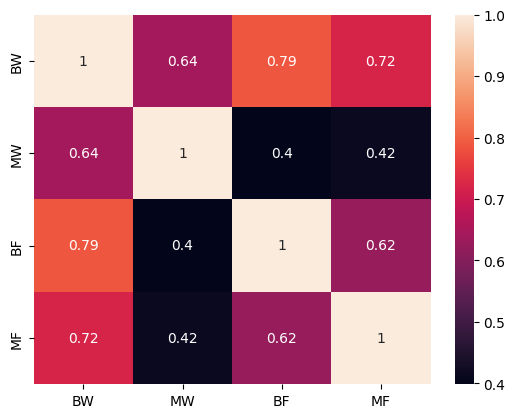

In [73]:
# plotting the heatmap 
hm = sn.heatmap(data = cfa.factor_varcovs_, 
                annot=True,
                xticklabels=xticklabels, 
                yticklabels=yticklabels) 
  
# displaying the plotted heatmap 
plt.show()

In [25]:
cfa.get_standard_errors()

(array([[0.16589795, 0.        , 0.        , 0.        ],
        [0.10698767, 0.        , 0.        , 0.        ],
        [0.14660336, 0.        , 0.        , 0.        ],
        [0.12583537, 0.        , 0.        , 0.        ],
        [0.10160227, 0.        , 0.        , 0.        ],
        [0.16110287, 0.        , 0.        , 0.        ],
        [0.07351794, 0.        , 0.        , 0.        ],
        [0.18885548, 0.        , 0.        , 0.        ],
        [0.        , 0.06145998, 0.        , 0.        ],
        [0.        , 0.04538336, 0.        , 0.        ],
        [0.        , 0.09224573, 0.        , 0.        ],
        [0.        , 0.02241304, 0.        , 0.        ],
        [0.        , 0.01770143, 0.        , 0.        ],
        [0.        , 0.13867639, 0.        , 0.        ],
        [0.        , 0.08644113, 0.        , 0.        ],
        [0.        , 0.        , 0.15674325, 0.        ],
        [0.        , 0.        , 0.02115845, 0.        ],
        [0.   

In [27]:
cfa_data = cfa.transform(ch_type_f_data.values)
cfa_data

array([[-0.51321763, -1.84209754, -3.36532989,  0.57661316],
       [-1.83635246, -1.17768756,  0.14781141, -3.19899477],
       [ 0.1944251 , -0.12931203,  1.09135152, -0.09272788],
       [-0.45665454, -0.36343983, -1.32079846, -0.2444896 ],
       [ 0.67202323,  1.25571856, -0.33010909,  0.16809307],
       [ 0.99499639,  1.41632701,  1.18277275,  1.65147344],
       [-1.2876567 , -1.17768756,  2.70656233, -1.07526917],
       [ 0.33594468,  0.11931973,  0.50390158,  0.43885639],
       [ 0.26518489, -0.99225605,  1.74877819, -0.50299736],
       [-0.5538164 , -0.39906127,  1.35867338, -1.00001747],
       [ 0.35555744,  0.20734303,  1.09135152,  0.0234666 ],
       [ 1.06575618,  0.11931973,  1.39442772,  0.43885639],
       [ 1.06575618,  1.41632701,  1.4671465 ,  1.65147344],
       [-1.54140935,  0.11931973, -2.38233743, -0.77376067],
       [ 0.89174443,  1.41632701,  0.72465194,  0.0234666 ],
       [-0.16508233, -0.12560646, -0.64449315, -0.09272788],
       [-1.19993161, -1.

## Factor Loadings:
> - Factor loadings represent the strength of the relationship between each observed variable and its associated latent factor.
> - Values close to 1 indicate a strong association, while values close to 0 suggest a weak association.
>> Interpretation:
>> - A loading of 0.7 or higher is considered strong.
>> - A loading between 0.4 and 0.7 is moderate.
>> - A loading below 0.4 is weak.
>> - Look at the loadings for each variable to understand which factors they contribute to.

In [23]:
# Get the factor loadings
loadings = cfa.loadings_
print("Factor Loadings:\n", loadings, loadings.shape)

Factor Loadings:
 [[1.01411329 0.         0.         0.        ]
 [0.50534273 0.         0.         0.        ]
 [1.20658052 0.         0.         0.        ]
 [0.74662306 0.         0.         0.        ]
 [0.38891186 0.         0.         0.        ]
 [1.0085796  0.         0.         0.        ]
 [0.36267747 0.         0.         0.        ]
 [1.60818691 0.         0.         0.        ]
 [0.         0.70072791 0.         0.        ]
 [0.         0.84620438 0.         0.        ]
 [0.         0.84537545 0.         0.        ]
 [0.         0.82296203 0.         0.        ]
 [0.         0.72036194 0.         0.        ]
 [0.         0.72686997 0.         0.        ]
 [0.         0.96304839 0.         0.        ]
 [0.         0.         0.90454902 0.        ]
 [0.         0.         0.71058253 0.        ]
 [0.         0.         0.54306479 0.        ]
 [0.         0.         0.76262405 0.        ]
 [0.         0.         0.6348472  0.        ]
 [0.         0.         0.9807792  0.     

# Apply loadings to Variables

In [31]:
loadings_Q8 = loadings[:8,0]
loadings_Q8

array([1.01411329, 0.50534273, 1.20658052, 0.74662306, 0.38891186,
       1.0085796 , 0.36267747, 1.60818691])

In [32]:
loadings_Q9 = loadings[8:15,1]
loadings_Q9

array([0.70072791, 0.84620438, 0.84537545, 0.82296203, 0.72036194,
       0.72686997, 0.96304839])

In [33]:
loadings_Q10 = loadings[15:23,2]
loadings_Q10

array([0.90454902, 0.71058253, 0.54306479, 0.76262405, 0.6348472 ,
       0.9807792 , 0.84407662, 1.21745918])

In [34]:
loadings_Q11 = loadings[23:,3]
loadings_Q11

array([0.82224133, 0.97387108, 0.89300064, 0.86576086, 0.59662026,
       0.76193875, 0.82456841])

In [36]:
column_names = ch_type_f_data.columns.tolist()
Col_Name_Q8 = column_names[:8]
Col_Name_Q9 = column_names[8:15]
Col_Name_Q10 = column_names[15:23]
Col_Name_Q11 = column_names[23:]

In [37]:
def column_map(df,loadings,col_names):
    for load,col in zip(loadings,col_names):
        df[col] = df[col].map(lambda x: x*load)
    return df[col_names]

In [38]:
ch_type_f_data[Col_Name_Q8]

,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8
1,3,1,4,3,4,1,4,3
2,1,3,1,1,5,3,3,1
3,4,4,4,3,4,4,4,4
4,4,3,4,3,3,4,3,2
5,5,5,4,4,5,4,5,5
6,5,5,5,4,5,5,5,5
7,3,4,2,2,3,1,4,2
8,4,4,4,5,4,4,4,4
9,4,4,4,4,4,4,4,4
10,3,4,3,2,3,3,3,3


In [39]:
# ch_type_f_data --> data
W_Q8_data = column_map(ch_type_f_data,loadings_Q8,Col_Name_Q8)

In [40]:
W_Q8_data

,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8
1,3.042340,0.505343,4.826322,2.239869,1.555647,1.008580,1.450710,4.824561
2,1.014113,1.516028,1.206581,0.746623,1.944559,3.025739,1.088032,1.608187
3,4.056453,2.021371,4.826322,2.239869,1.555647,4.034318,1.450710,6.432748
4,4.056453,1.516028,4.826322,2.239869,1.166736,4.034318,1.088032,3.216374
5,5.070566,2.526714,4.826322,2.986492,1.944559,4.034318,1.813387,8.040935
6,5.070566,2.526714,6.032903,2.986492,1.944559,5.042898,1.813387,8.040935
7,3.042340,2.021371,2.413161,1.493246,1.166736,1.008580,1.450710,3.216374
8,4.056453,2.021371,4.826322,3.733115,1.555647,4.034318,1.450710,6.432748
9,4.056453,2.021371,4.826322,2.986492,1.555647,4.034318,1.450710,6.432748
10,3.042340,2.021371,3.619742,1.493246,1.166736,3.025739,1.088032,4.824561


In [46]:
# ch_type_f_data --> data
W_Q9_data = column_map(ch_type_f_data,loadings_Q9,Col_Name_Q9)

In [47]:
# ch_type_f_data --> data
W_Q10_data = column_map(ch_type_f_data,loadings_Q10,Col_Name_Q10)

In [48]:
# ch_type_f_data --> data
W_Q11_data = column_map(ch_type_f_data,loadings_Q11,Col_Name_Q11)

In [59]:
series_Q8 = (W_Q8_data.sum(axis=1))/8
series_Q8

1     2.431671
2     1.518733
3     3.327180
4     2.768017
5     3.905412
6     4.182307
7     1.976565
8     3.513836
9     3.420508
10    2.535221
11    3.628630
12    4.275635
13    4.275635
14    1.825050
15    4.007620
16    2.800728
17    1.990858
18    3.420508
19    3.872781
20    2.767211
21    3.375173
22    2.609005
23    2.206549
24    3.264012
25    2.022084
26    3.659054
27    3.370395
28    2.722497
29    3.143613
30    3.842244
31    3.895342
32    3.420508
33    3.453944
34    2.273503
35    3.549674
36    4.182307
37    2.878730
38    4.086394
39    3.714859
40    3.282652
41    3.318299
42    2.578969
dtype: float64

In [60]:
type(series_Q8)

pandas.core.series.Series

In [61]:
series_Q9 = (W_Q9_data.sum(axis=1))/7

In [62]:
series_Q10 = (W_Q10_data.sum(axis=1))/8

In [63]:
series_Q11 = (W_Q11_data.sum(axis=1))/7

In [64]:
final_concated = pd.concat([series_Q8, series_Q9, series_Q10, series_Q11], axis=1)

In [65]:
    # "BW": Q8,
    # "FB": Q9,
    # "FW": Q10,
    # "MW": Q11
final_concated.columns = ["BW","MW","BF","MF"]

In [66]:
final_concated

,BW,MW,BF,MF
1,2.431671,2.517078,2.442908,2.488084
2,1.518733,2.410950,1.694519,0.819714
3,3.327180,2.959456,3.298991,3.037382
4,2.768017,2.752708,2.429711,3.066055
5,3.905412,3.900684,2.694113,3.193626
6,4.182307,4.018250,4.028411,4.098572
7,1.976565,2.410950,2.577376,2.818695
8,3.513836,3.214600,3.051481,3.278858
9,3.420508,2.513859,3.210168,2.544375
10,2.535221,2.735779,2.739494,2.576606


In [67]:
final_concated.to_csv("cfa_scores_df.csv",index=False)

In [77]:
# raw_df
# final_raw_df_concated = 
final_raw_df_concated = pd.concat([raw_df,final_concated], axis=1)

In [78]:
final_raw_df_concated.to_csv("concated_cfa_scores_df.csv",index=False)

Absolutely, here's a breakdown of the outputs you get from `factor_analyzer` in Python for confirmatory factor analysis:

**1. cfa.loadings_**: This attribute contains the **factor loadings**. These values represent how strongly each observed variable is associated with the underlying latent factors. A high loading (closer to 1 in absolute value) indicates a strong relationship between the variable and the factor.

**2. cfa.factor_varcovs_**: This attribute stores the **factor variance-covariance matrix**. It shows the covariances between the latent factors themselves. A non-zero covariance suggests that the factors are related to each other to some degree.

**3. cfa.get_standard_errors()**: This function provides the **standard errors** for the factor loadings. Standard errors help assess the reliability of the loading estimates. A smaller standard error indicates a more precise estimate of the loading.

**4. cfa.transform(ch_type_f_data.values)**: This function applies the estimated factor model to your data. It transforms the original observed variables into scores on the latent factors. These scores can be used for further analysis, such as exploring relationships between the latent factors and other variables.

In simpler terms, the outputs provide information about how well your data fits the hypothesized factor structure. The loadings tell you which observed variables are most influenced by each factor, the factor covariances show connections between the factors, standard errors help gauge the certainty of the loading estimates, and the transformed data allows you to analyze the underlying factors themselves.


# let's delve deeper into number 4, `cfa.transform(ch_type_f_data.values)`, in confirmatory factor analysis using `factor_analyzer` in Python:

**What it does:**

This function essentially translates your original observed data points into scores representing the latent factors. Remember, in confirmatory factor analysis, you're assuming there are underlying factors that influence the observed variables you measured. `cfa.transform` mathematically recovers these latent factor scores based on the estimated factor model.

**How it works:**

The transformation process relies on the factor loadings (`cfa.loadings_`) obtained during the analysis. These loadings indicate how much each observed variable contributes to each latent factor. Here's a simplified example:

- Imagine you have two observed variables (X1 and X2) and one latent factor (F1).
- `cfa.loadings_` might show that X1 has a loading of 0.8 on F1 and X2 has a loading of 0.7 on F1.

When you provide `ch_type_f_data.values` (which likely contains your observed data points), `cfa.transform` multiplies each variable in your data by its corresponding loading on the factor(s). These products are then summed up to create a score for each data point on the latent factor(s).

**What the output represents:**

The output of `cfa.transform` is a new data matrix containing the estimated scores on the latent factors for each data point in your original data. These scores represent the unobserved underlying factors that are assumed to be influencing the observed variables.

**Use cases of the transformed data:**

The transformed data, containing the latent factor scores, unlocks further analysis possibilities:

- **Understanding relationships between latent factors and other variables:** You can use these scores in regression models or other analyses to see how the latent factors might influence other variables of interest that weren't part of the original factor analysis.
- **Clustering or grouping data points based on latent factors:** By analyzing the latent factor scores, you can group data points that share similar scores on the factors, potentially revealing underlying patterns in your data.
- **Visualization:** The factor scores can be used to create visualizations like scatter plots to explore relationships between the latent factors themselves or between the factors and other variables.

By using `cfa.transform`, you effectively bridge the gap between the theoretical latent factors and your observed data, allowing you to analyze and interpret the underlying factors that may be driving the observed relationships in your data.

# END of tests